# Assignment 03

The following assignment is divided in two parts:
- Part A: Run the cells that have already been coded for you to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 1a, 1b, 2a, 2b
- Part B:  Run the cells that have already been coded for you to train the given Neural Network and then respond to the questions 03 to 10 in your video

**Note:**

Coding: 5%
video presentation: 5%
Total: 10%
But without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [3]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [4]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [5]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [6]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




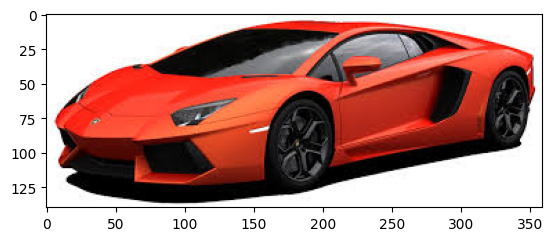

In [7]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [8]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


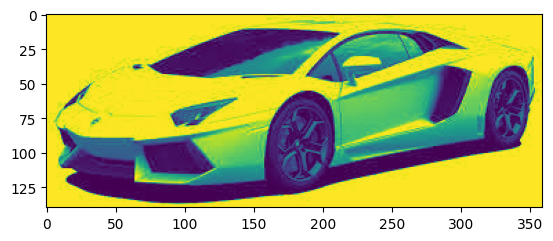

In [9]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
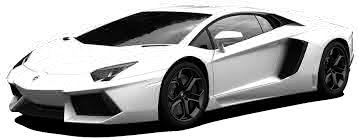

In [10]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

## Convolution with 2-D Kernels

How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [11]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [12]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [13]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

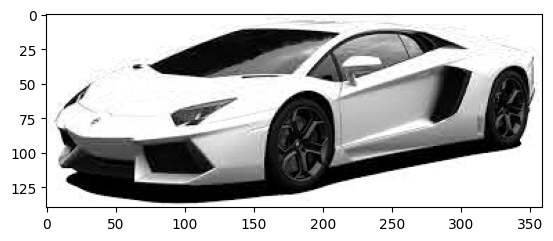

In [14]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [15]:
# Define a function to trim out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [16]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

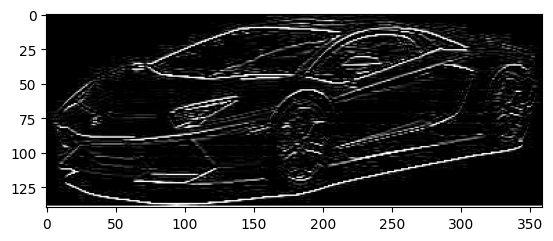

In [17]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

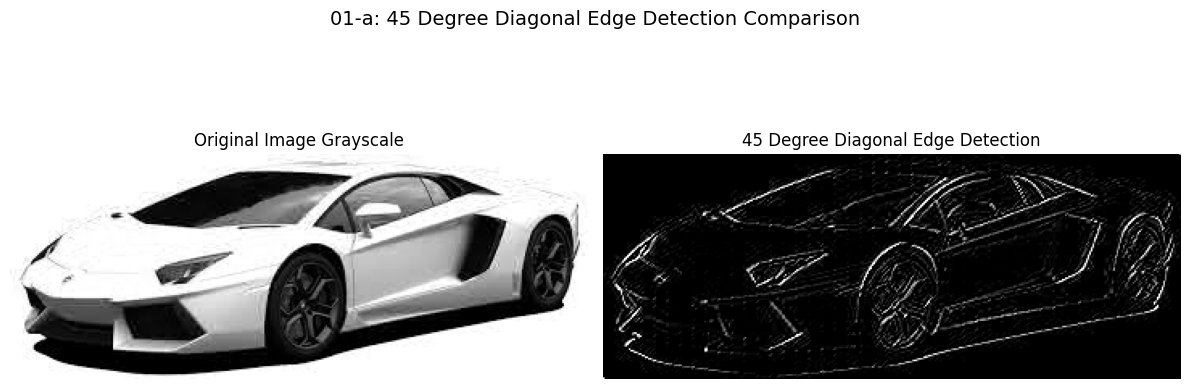

In [33]:
# Type your code here

# Convolution kernel to detect 45 degree diagonal lines (bottom-left to top-right)
kernel_45_degrees = np.array([[-1, -1, 2],
                              [-1, 2, -1],
                              [2, -1, -1]])

# Apply convolution kernel to image using conv_2d_kernel func
image_45_degrees = conv_2d_kernel(input_img_arr, kernel = kernel_45_degrees)

# Original image plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image Grayscale")
plt.axis('off')

# 45 degree diagonal edge detection image plot
plt.subplot(1, 2, 2)
plt.imshow(image_45_degrees, cmap='gray')
plt.title("45 Degree Diagonal Edge Detection")
plt.axis('off')

# Plot layout and title
plt.suptitle("01-a: 45 Degree Diagonal Edge Detection Comparison", fontsize=14)
plt.tight_layout()
plt.show()

#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

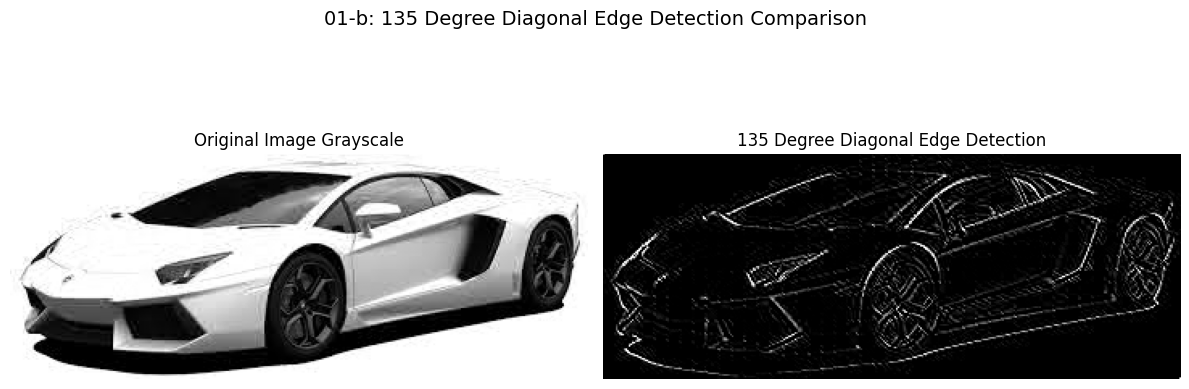

In [38]:
# Type your code here

# Convolution kernel to detect 135 degree diagonal lines (top-left to bottom-right)
kernel_135_degrees = np.array([[2, -1, -1],
                              [-1, 2, -1],
                              [-1, -1, 2]])

# Apply convolution kernel to image using conv_2d_kernel func
image_135_degrees = conv_2d_kernel(input_img_arr, kernel = kernel_135_degrees)

# Original image plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_img_arr, cmap='gray')
plt.title("Original Image Grayscale")
plt.axis('off')

# 45 degree diagonal edge detection image plot
plt.subplot(1, 2, 2)
plt.imshow(image_135_degrees, cmap='gray')
plt.title("135 Degree Diagonal Edge Detection")
plt.axis('off')

# Plot layout and title
plt.suptitle("01-b: 135 Degree Diagonal Edge Detection Comparison", fontsize=14)
plt.tight_layout()
plt.show()

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [20]:
# Kernel to detect diagonal edges
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

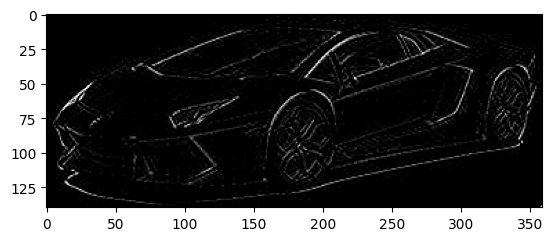

In [21]:
# Type your code here

# Apply convolution kernel to image using conv_2d_kernel func
edge_image_1 = conv_2d_kernel(input_img_arr, edge_kernel_1)

# Plot image
plt.imshow(edge_image_1, cmap='gray')

#### 02-b:

In [22]:
# Kernel to detect edges without diagonals
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

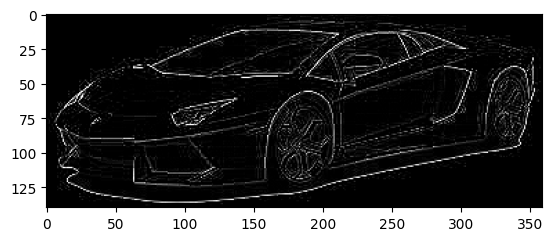

In [23]:
# Type your code here

# Apply convolution kernel to image using conv_2d_kernel func
edge_image_2 = conv_2d_kernel(input_img_arr, edge_kernel_2)

# Plot image
plt.imshow(edge_image_2, cmap='gray')

#### 02-c:

In [24]:
# Kernel to detect edges in all directions via neighbouring weights (Laplacian Operator)
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

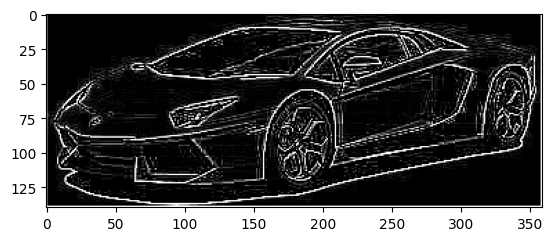

In [39]:
# Type your code here

# Apply convolution kernel to image using conv_2d_kernel func
edge_image_3 = conv_2d_kernel(input_img_arr, edge_kernel_3)

# Plot image
plt.imshow(edge_image_3, cmap='gray')

# PART B

## Importing Libraries

In [1]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [4]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Display a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

## CustomCallback class for logging

In [7]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [8]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [9]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4050399959087372
Accuracy reached val is 0.4844000041484833

 Finished epoch # 5
Accuracy resched train is 0.6444399952888489
Accuracy reached val is 0.6237000226974487

 Finished epoch # 10
Accuracy resched train is 0.7069600224494934
Accuracy reached val is 0.6446999907493591

 Finished epoch # 15
Accuracy resched train is 0.752839982509613
Accuracy reached val is 0.6626999974250793

 Finished epoch # 20
Accuracy resched train is 0.7905600070953369
Accuracy reached val is 0.6675999760627747

 Finished epoch # 25
Accuracy resched train is 0.8202000260353088
Accuracy reached val is 0.6651999950408936

 Finished epoch # 30
Accuracy resched train is 0.8519200086593628
Accuracy reached val is 0.6539999842643738

 Finished epoch # 35
Accuracy resched train is 0.8809999823570251
Accuracy reached val is 0.6517999768257141

 Finished epoch # 40
Accuracy resched train is 0.9084399938583374
Accuracy reached val is 0.6486999988555908

 Finished epo

## Plotting the Results

In [10]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

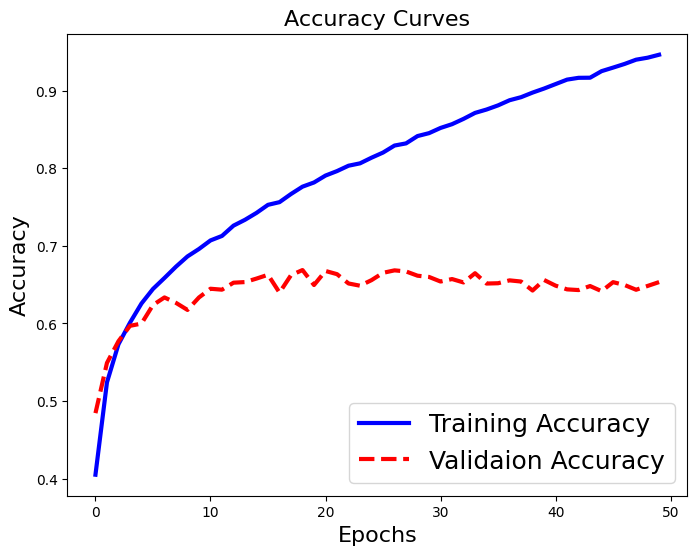

In [11]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network present signs of overfitting? If so, in which epoch?

Answer: Yes it shows signs of overfitting, as while our training accuracy continues to rise at a steady rate, our validation accuracy plateaus at 20 epochs, indicating a high likelihood that our model is overfitting.

#### 04: Write down how many layers this model has and identify their types

Answer: Our model has 5 layers of the following types:
1. conv2D - Our convolution layer
2. maxPooling2D - Our pooling layer
3. Flatten() - Out flatten layer
4. Dense(128, activation='relu') - Our dense layer
5. Dense(10, activation='softmax') - Our output layer

#### 05: Briefly explain what is the purpose of each of those layers

Answer:
1. Conv2D - Extracts any features from the image using filters to detect edges, lines, etc.
2. MaxPooling2D - Reduces overfitting and lowers computational burden by downsampling the dataset.
3. Flatten - Converts our 2D maps into a 1D array to be used by our Dense layers.
4. Dense (128) - Learns patterns and relationships from our maps.
5. Dense (10) - Outputs the class probabilities of each feature for the ten CIFAR-10 categories.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [26]:
# Type your code here

# Model with an extra convolution layer
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          # 2nd convolution layer
          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

In [27]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.45862001180648804
Accuracy reached val is 0.5343000292778015

 Finished epoch # 5
Accuracy resched train is 0.7366999983787537
Accuracy reached val is 0.6776999831199646

 Finished epoch # 10
Accuracy resched train is 0.8487600088119507
Accuracy reached val is 0.6976000070571899

 Finished epoch # 15
Accuracy resched train is 0.9444000124931335
Accuracy reached val is 0.6765999794006348

 Finished epoch # 20
Accuracy resched train is 0.9884799718856812
Accuracy reached val is 0.6929000020027161

 Finished epoch # 25
Accuracy resched train is 0.9787999987602234
Accuracy reached val is 0.6898999810218811

 Finished epoch # 30
Accuracy resched train is 0.9990400075912476
Accuracy reached val is 0.6990000009536743

 Finished epoch # 35
Accuracy resched train is 0.9994800090789795
Accuracy reached val is 0.6865000128746033

 Finished epoch # 40
Accuracy resched train is 0.999779999256134
Accuracy reached val is 0.6992999911308289

 Finished ep

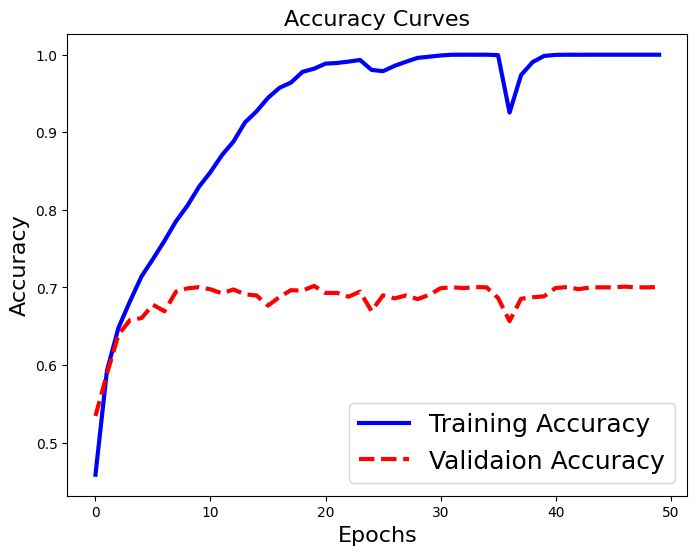

In [28]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results between the original model made using keras.Sequential VS the bigger model with at least 1 extra layer added.  Describe what are the differences between them.

Answer: In regards to our results, our larger model had significant improvements to its training accuracy speed, allowing it to reach not only a higher peak accuracy, but also reach a higher accuracy at a faster pace to the original model.

This is also true for our validation accuracy, as our larger model had a higher validation accuracy peak of 70 compared to the original model's 66, and it consistently reached these higher accuracies at a faster rate.

However, our larger model also seems to suffer from overfitting much like our original model, despite the addition of an extra convolution layer. Our larger model seems to plateau at roughly the same epochs as our original model, and like the original model exhibits a stagnant trend in validation accuracy from there onwards.

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. Modify it to add a dropout layer
2. Run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. Once the training is complete, run the following cell containing the ```result_plotting()``` function




In [33]:
# Type your code here
from keras.layers import Dropout

# Model with an extra convolution layer and new Dropout layer
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          # 2nd convolution layer
          keras.layers.Conv2D(64, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          # Dropout layer to drop 50% of neurons during training
          Dropout(0.5),
          keras.layers.Dense(10, activation='softmax'),
])

In [34]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.3585599958896637
Accuracy reached val is 0.5157999992370605

 Finished epoch # 5
Accuracy resched train is 0.6226599812507629
Accuracy reached val is 0.6607999801635742

 Finished epoch # 10
Accuracy resched train is 0.6974400281906128
Accuracy reached val is 0.6832000017166138

 Finished epoch # 15
Accuracy resched train is 0.7509599924087524
Accuracy reached val is 0.7103000283241272

 Finished epoch # 20
Accuracy resched train is 0.7917199730873108
Accuracy reached val is 0.7106999754905701

 Finished epoch # 25
Accuracy resched train is 0.8269199728965759
Accuracy reached val is 0.7113000154495239

 Finished epoch # 30
Accuracy resched train is 0.8451399803161621
Accuracy reached val is 0.7074999809265137

 Finished epoch # 35
Accuracy resched train is 0.8605599999427795
Accuracy reached val is 0.7035999894142151

 Finished epoch # 40
Accuracy resched train is 0.8792600035667419
Accuracy reached val is 0.7081999778747559

 Finished ep

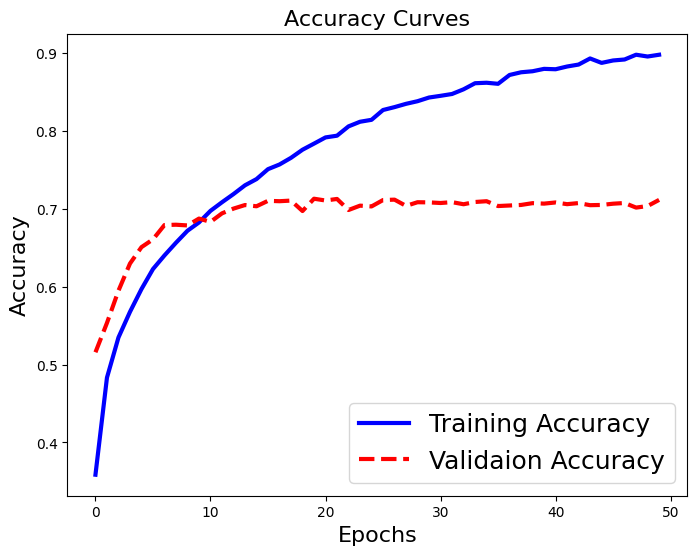

In [35]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works. And briefly explain in your video in your own words.

Answer: A dropout layer is designed to help prevent overfitting by dropping a specified amount of neurons in the layer temporarily in order for their weights to not be updated during that section of training the model. This helps reduce overfitting by forcing the model to learn new patterns and represenstations without heavily focusing on a specific set of neurons, reducing the model's dependency on them when generalizing the rest of the dataset.

Submission Instructions:
- YOU MUST SUBMIT A LINK TO YOUR ONLINE VIDEO (Youtube, Vimeo, etc) as a COMENTS SUBMISSION SECTION on your D2L SUBMISSION. Omitting this comment will result in a 0% for your total mark. Video should be between 5-15 minutes. Please remember to make your video unlisted or public, but it cannot be private. Please verify it's accessible using an incongito tab.  (5%)

- The Assignment03 **ipynb file** that contains all the code. (5%)
